In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
from os import listdir, path
import seaborn as sns

sns.set(style='whitegrid', palette='Set2')

## Cleaning raw ratings data and storing for further analysis

In [2]:
dirname = 'data/raw_ratings'
dfs = []

# iterate over participant data, reject bad participants, throw out catch + filler trials
for i, fname in enumerate(sorted(listdir(dirname))):
    if fname.endswith('.csv'):
        df = pd.read_csv(path.join(dirname, fname))
        if len(df) > 100:
            df['pp'] = fname.removesuffix('.csv')
            df['response'] = df.responses.str[10].astype(float) / 6
            df.answer = df.answer.str.replace('completely true', '1').str.replace('completely false', '0').astype(float)
            df['catch_correct'] = df.answer == df.response
            print(f"{i}. {fname.removesuffix('.csv')}: {df.catch_correct.sum() / 16:.2f}")
            if df.catch_correct.sum() > .85:  # reject pp with catch/filler score below 85%
                dfs.append(df[df.catch.isna()])  # append non-catch non-filler trials

print(f"\n{len(dfs)} usable participants")
df = pd.concat(dfs)

1. A10AVWALIHR4UQ: 1.00
2. A12X8RUSITV7RU: 1.00
3. A136K4YZY2OFTV: 1.00
4. A184MZVD0VRQDP: 0.88
5. A19M1TGTL9HKHB: 1.00
6. A1BM57TUNAQIXM: 0.88
8. A1I16447TV7B9D: 0.62
9. A1JI19KPIVNL3Y: 1.00
10. A1K2R6FBPUA5TQ: 1.00
11. A1K4FKVCBTX1RN: 1.00
12. A1P9ZZAW0TMNTR: 0.94
14. A1Q56N80RJLQ7S: 0.94
15. A1Q6VY3C3CEOA0: 0.94
16. A1QMJNJ5FGC09: 0.56
17. A1R0NGPP4NGUTE: 1.00
18. A1SLJKNSNHOJRN: 1.00
19. A1TOER30AQUY2F: 0.81
21. A1WW22TG79S8F: 0.69
22. A1YT6E0W0SDP0R: 0.94
23. A20N1NK5X5S88F: 1.00
24. A22ZVIE16COF5D: 0.88
25. A23FEELMFHLC9K: 1.00
27. A24IWWIUPASCQJ: 0.75
28. A26SF9CTNKKBYB: 1.00
29. A283W4862AJY4G: 1.00
30. A28AXX4NCWPH1F: 1.00
31. A290TNNAJJQCWL: 1.00
32. A2CEGS0NVDBCPT: 0.94
33. A2CK615DQZY1DV: 0.94
34. A2EK1HDV4I4GSK: 1.00
35. A2H1Z6ZQKUQ3BM: 1.00
36. A2J1ANUL0BYKUK: 1.00
37. A2K0L9M1ZZO5C9: 1.00
38. A2LR1HKNOVDTJ8: 1.00
39. A2M183CETUMR96: 1.00
40. A2NXMRPHG86N2T: 1.00
41. A2ONILC0LZKG6Y: 1.00
42. A2QOB4FDI8ZHOB: 1.00
43. A2R0YYUAWNT7UD: 1.00
45. A3774HPOUKYTX7: 0.62
46. A37GOI

In [3]:
display(df.groupby(['question_type', 'type']).count())

responses    rt  answer  catch  choices  item  \
question_type type                                                         
by_virtue_of  principled        1094  1094       0      0     1094  1094   
              statistical       1090  1090       0      0     1090  1090   
cue_validity  principled        1085  1085       0      0     1085  1085   
              statistical       1087  1087       0      0     1087  1087   
generic       principled        1092  1092       0      0     1092  1092   
              statistical       1092  1092       0      0     1092  1092   
prevalence    principled        1092  1092       0      0     1092  1092   
              statistical       1092  1092       0      0     1092  1092   

                           list_number  prompt  property  stimulus  subject  \
question_type type                                                            
by_virtue_of  principled           795    1094      1094      1094     1094   
              statistical          791    1090      1090      1090     1090   
cue_validity  principled           786       0      1085      1085     1085   
              statistical          788       0      1087      1087     1087   
generic       principled           793    1092      1092      1092     1092   
              statistical          793    1092      1092      1092     1092   
prevalence    principled           794       0      1092      1092     1092   
              statistical          792       0      1092      1092     1092   

                           trial_num    pp  response  catch_correct  
question_type type                                                   
by_virtue_of  principled        1094  1094      1094           1094  
              statistical       1090  1090      1090           1090  
cue_validity  principled        1085  1085      1085           1085  
              statistical       1087  1087      1087           1087  
generic       principled        1092  1092      1092           1092  
              statistical       1092  1092      1092           1092  
prevalence    principled        1092  1092      1092           1092  
              statistical       1092  1092      1092           1092

In [4]:
display(df.groupby(['question_type', 'type']).mean().round(2))

/var/folders/py/jxr8v1g13rs0lgpdf083hc7c0000gn/T/ipykernel_86267/865029389.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df.groupby(['question_type', 'type']).mean().round(2))


rt  answer  list_number  trial_num  response  \
question_type type                                                             
by_virtue_of  principled   8268.25     NaN         7.33      60.93      0.81   
              statistical  6939.48     NaN         7.36      57.37      0.49   
cue_validity  principled   7959.37     NaN         7.32      61.65      0.60   
              statistical  7723.84     NaN         7.34      59.85      0.53   
generic       principled   5529.31     NaN         7.33      60.09      0.88   
              statistical  6674.84     NaN         7.35      61.67      0.68   
prevalence    principled   6488.78     NaN         7.41      61.07      0.90   
              statistical  6159.72     NaN         7.27      61.74      0.74   

                           catch_correct  
question_type type                        
by_virtue_of  principled             0.0  
              statistical            0.0  
cue_validity  principled             0.0  
              statistical            0.0  
generic       principled             0.0  
              statistical            0.0  
prevalence    principled             0.0  
              statistical            0.0

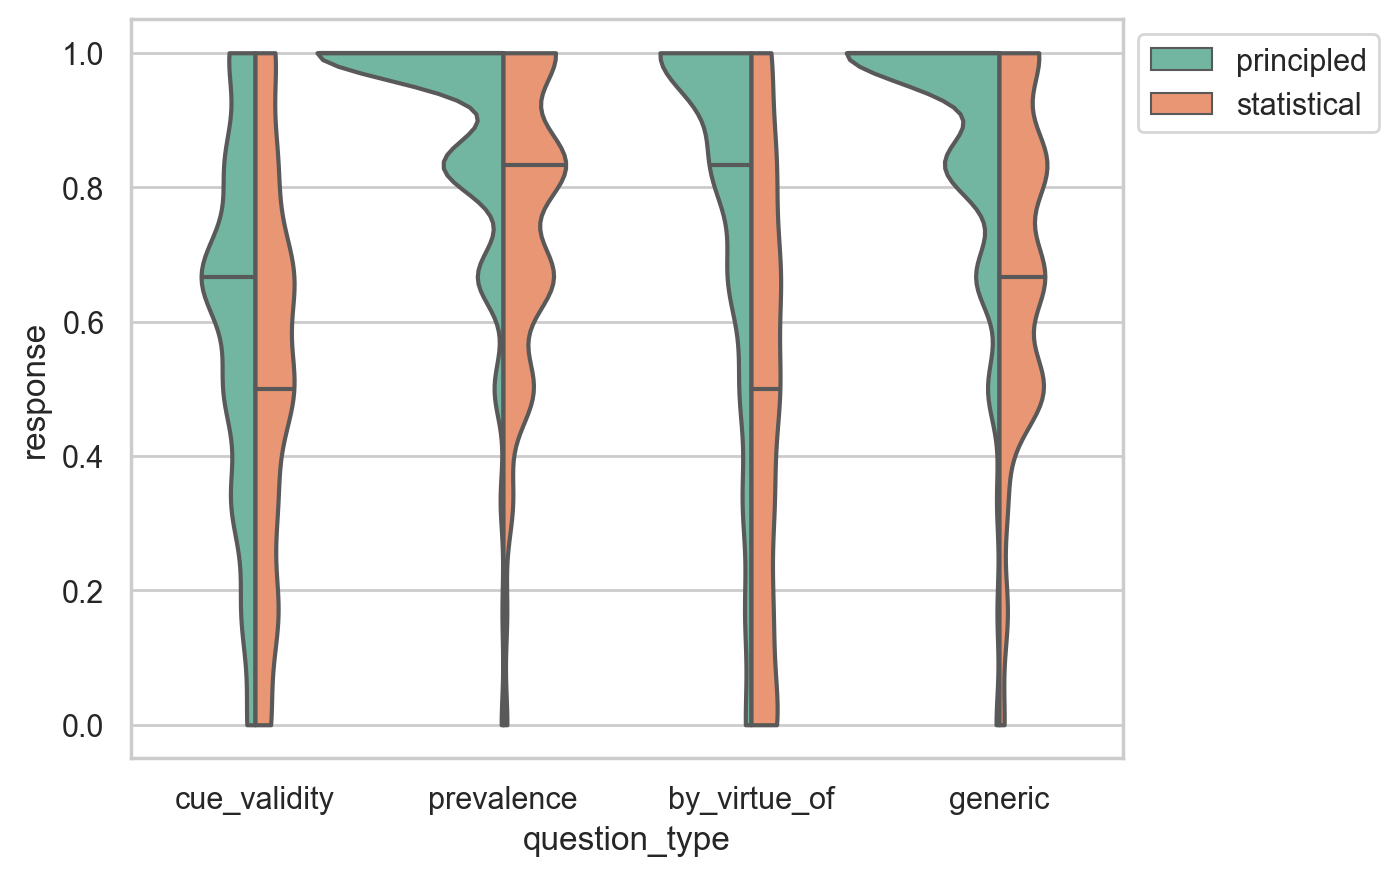

In [5]:
ax = sns.violinplot(
    y='response',
    x='question_type',
    hue='type',
    data=df,
    cut=0,
    inner='quartile',
    width=1.5,
    scale='area',
    scale_hue=False,
    split=True,
)
for l in ax.lines[1::3]:
    l.set(linestyle='-')
for l in ax.lines[0::3]:
    l.set(alpha=.0)
for l in ax.lines[2::3]:
    l.set(alpha=.0)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.figure.savefig('figures/novel_ratings_violins.pdf')

In [6]:
df = (
    df
    .pivot(
        index=['pp', 'type', 'item', 'subject', 'property'],
        columns='question_type',
        values='response'
    )
    .reset_index()
)
df['source'] = 'novel'
df.to_csv('data/novel_data.csv', index=False)
display(df)

question_type,pp,type,item,subject,property,by_virtue_of,cue_validity,generic,prevalence,source
0,A10AVWALIHR4UQ,principled,airplanes have wings,airplanes,have wings,NaN,NaN,1.0,NaN,novel
1,A10AVWALIHR4UQ,principled,ambulances have sirens,ambulances,have sirens,1.0,NaN,NaN,NaN,novel
2,A10AVWALIHR4UQ,principled,americans live in america,Americans,live in America,NaN,1.000000,NaN,NaN,novel
3,A10AVWALIHR4UQ,principled,ants are insects,ants,are insects,NaN,NaN,NaN,1.000000,novel
4,A10AVWALIHR4UQ,principled,architects design buildings,architects,design buildings,NaN,0.833333,NaN,NaN,novel
...,...,...,...,...,...,...,...,...,...,...
8719,AZZA3J049G7R5,statistical,trumpets are loud,trumpets,are loud,NaN,NaN,1.0,NaN,novel
8720,AZZA3J049G7R5,statistical,turtles eat lettuce,turtles,eat lettuce,0.5,NaN,NaN,NaN,novel
8721,AZZA3J049G7R5,statistical,united states presidents are men,United States presidents,are men,0.0,NaN,NaN,NaN,novel
8722,AZZA3J049G7R5,statistical,wallets are made of leather,wallets,are made of leather,NaN,NaN,NaN,0.666667,novel
